In [105]:
import numpy as np
import pandas as pd
import seaborn as sns

In [81]:
df=pd.read_csv('heart_disease_uci.csv')
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [83]:
df_numeric=['age','trestbps','chol','thalch','oldpeak']
df_ordinal=['cp','restecg','slope','ca','thal']
df_binary=['sex','fbs','exang']
df_nominal=['dataset']

In [84]:
df[df_numeric].dropna()

age  trestbps   chol  thalch  oldpeak
0     63     145.0  233.0   150.0      2.3
1     67     160.0  286.0   108.0      1.5
2     67     120.0  229.0   129.0      2.6
3     37     130.0  250.0   187.0      3.5
4     41     130.0  204.0   172.0      1.4
..   ...       ...    ...     ...      ...
913   62     158.0  170.0   138.0      0.0
914   46     134.0  310.0   126.0      0.0
915   54     127.0  333.0   154.0      0.0
917   55     122.0  223.0   100.0      0.0
919   62     120.0  254.0    93.0      0.0

[827 rows x 5 columns]

In [85]:
numeric_mat=np.zeros((6,6))

In [86]:
#euclidean distance
for i in range(6):
    for j in range(6):
        euclid_dist=0
        for k in df_numeric:
            euclid_dist +=(abs(df[k].iloc[i]-df[k].iloc[j]))**2
        numeric_mat[i][j]=np.sqrt(euclid_dist)

numeric_mat

array([[  0.        ,  69.38760696,  33.13744106,  50.60079051,
         45.10886831,  38.33079702],
       [ 69.38760696,   0.        ,  72.74070387,  96.64884893,
        111.33737019,  95.50649193],
       [ 33.13744106,  72.74070387,   0.        ,  69.32394969,
         57.02139949,  50.73696877],
       [ 50.60079051,  96.64884893,  69.32394969,   0.        ,
         48.59434123,  27.3       ],
       [ 45.10886831, 111.33737019,  57.02139949,  48.59434123,
          0.        ,  37.2204245 ],
       [ 38.33079702,  95.50649193,  50.73696877,  27.3       ,
         37.2204245 ,   0.        ]])

In [87]:
similarity_mat=[]
for i in range(len(df_numeric)):
  sim_mat=np.zeros((6,6))
  for j in range(6):
    for k in range(6):
      sim_mat[j][k]=abs(df[df_numeric[i]].iloc[j]-df[df_numeric[i]].iloc[k])
  similarity_mat.append(sim_mat)

for i in range(len(similarity_mat)):
  print('similarity matrice of : ',df_numeric[i])
  print(similarity_mat[i])

similarity matrice of :  age
[[ 0.  4.  4. 26. 22.  7.]
 [ 4.  0.  0. 30. 26. 11.]
 [ 4.  0.  0. 30. 26. 11.]
 [26. 30. 30.  0.  4. 19.]
 [22. 26. 26.  4.  0. 15.]
 [ 7. 11. 11. 19. 15.  0.]]
similarity matrice of :  trestbps
[[ 0. 15. 25. 15. 15. 25.]
 [15.  0. 40. 30. 30. 40.]
 [25. 40.  0. 10. 10.  0.]
 [15. 30. 10.  0.  0. 10.]
 [15. 30. 10.  0.  0. 10.]
 [25. 40.  0. 10. 10.  0.]]
similarity matrice of :  chol
[[ 0. 53.  4. 17. 29.  3.]
 [53.  0. 57. 36. 82. 50.]
 [ 4. 57.  0. 21. 25.  7.]
 [17. 36. 21.  0. 46. 14.]
 [29. 82. 25. 46.  0. 32.]
 [ 3. 50.  7. 14. 32.  0.]]
similarity matrice of :  thalch
[[ 0. 42. 21. 37. 22. 28.]
 [42.  0. 21. 79. 64. 70.]
 [21. 21.  0. 58. 43. 49.]
 [37. 79. 58.  0. 15.  9.]
 [22. 64. 43. 15.  0.  6.]
 [28. 70. 49.  9.  6.  0.]]
similarity matrice of :  oldpeak
[[0.  0.8 0.3 1.2 0.9 1.5]
 [0.8 0.  1.1 2.  0.1 0.7]
 [0.3 1.1 0.  0.9 1.2 1.8]
 [1.2 2.  0.9 0.  2.1 2.7]
 [0.9 0.1 1.2 2.1 0.  0.6]
 [1.5 0.7 1.8 2.7 0.6 0. ]]


In [88]:
df[df_ordinal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       920 non-null    object 
 1   restecg  918 non-null    object 
 2   slope    611 non-null    object 
 3   ca       309 non-null    float64
 4   thal     434 non-null    object 
dtypes: float64(1), object(4)
memory usage: 36.1+ KB


In [89]:
print(df.cp.unique())
print(df.restecg.unique())
print(df.slope.unique())
print(df.thal.unique())

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
['downsloping' 'flat' 'upsloping' nan]
['fixed defect' 'normal' 'reversable defect' nan]


In [90]:
rank_cp={'typical angina' :0,'atypical angina': 1,'non-anginal': 2,'asymptomatic': 3}
df['cp']=df['cp'].map(rank_cp)
rank_restecg={'normal':0,'st-t abnormality':1,'lv hypertrophy':2}
df['restecg']=df['restecg'].map(rank_restecg)
rank_slope={'upsloping':0,'flat':1,'downsloping':2}
df['slope']=df['slope'].map(rank_slope)
rank_thal={'normal':0,'fixed defect':2,'reversable defect':1}
df['thal']=df['thal'].map(rank_thal)

In [91]:
df[df_ordinal]=(df[df_ordinal]-df[df_ordinal].min())/(df[df_ordinal].max()-df[df_ordinal].min())

In [92]:
df[df_ordinal].head()

cp  restecg  slope        ca  thal
0  0.000000      1.0    1.0  0.000000   1.0
1  1.000000      1.0    0.5  1.000000   0.0
2  1.000000      1.0    0.5  0.666667   0.5
3  0.666667      0.0    1.0  0.000000   0.0
4  0.333333      1.0    0.0  0.000000   0.0

In [93]:
#dis mat for ordinal
dissimalirity_mat_ord = np.zeros((6, 6))  # Initialize as a 6x6 NumPy array

for i in range(6):
    for j in range(6):
        dist = 0
        for k in df_ordinal:
          dist = dist + np.square(abs(df[k].iloc[i] - df[k].iloc[j]))
        dissimalirity_mat[i][j] = np.sqrt(dist)

dissimalirity_mat

array([[0.        , 1.80277564, 1.39443338, 1.56347192, 1.45296631,
        1.76383421],
       [1.80277564, 0.        , 0.60092521, 1.53659074, 1.30170828,
        1.6414763 ],
       [1.39443338, 0.60092521, 0.        , 1.43372088, 1.1785113 ,
        1.54560308],
       [1.56347192, 1.53659074, 1.43372088, 0.        , 1.45296631,
        1.05409255],
       [1.45296631, 1.30170828, 1.1785113 , 1.45296631, 0.        ,
        1.        ],
       [1.76383421, 1.6414763 , 1.54560308, 1.05409255, 1.        ,
        0.        ]])

In [94]:
simmetrical_mat=[]
for i in range(len(df_ordinal)):
  sim_mat=np.zeros((6,6))
  for j in range(6):
    for k in range(6):
      sim_mat[j][k]=abs(df[df_ordinal[i]].iloc[j]-df[df_ordinal[i]].iloc[k])
  simmetrical_mat.append(sim_mat)

for i in range(len(simmetrical_mat)):
  print('similarity matrice of : ',df_ordinal[i])
  print(simmetrical_mat[i])


similarity matrice of :  cp
[[0.         1.         1.         0.66666667 0.33333333 0.33333333]
 [1.         0.         0.         0.33333333 0.66666667 0.66666667]
 [1.         0.         0.         0.33333333 0.66666667 0.66666667]
 [0.66666667 0.33333333 0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.66666667 0.66666667 0.33333333 0.         0.        ]
 [0.33333333 0.66666667 0.66666667 0.33333333 0.         0.        ]]
similarity matrice of :  restecg
[[0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1.]
 [1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [1. 1. 1. 0. 1. 0.]]
similarity matrice of :  slope
[[0.  0.5 0.5 0.  1.  1. ]
 [0.5 0.  0.  0.5 0.5 0.5]
 [0.5 0.  0.  0.5 0.5 0.5]
 [0.  0.5 0.5 0.  1.  1. ]
 [1.  0.5 0.5 1.  0.  0. ]
 [1.  0.5 0.5 1.  0.  0. ]]
similarity matrice of :  ca
[[0.         1.         0.66666667 0.         0.         0.        ]
 [1.         0.         0.33333333 1.         1.         1.        ]
 [0.66666667 0.33333333 0.         0.

In [95]:
#nominal dis mat
dissimilarity_mat = np.zeros((6, 6))

for i in range(6):
    for j in range(6):
        dist = 0
        dist = dist + 1 if df[df_nominal[0]].iloc[i] != df[df_nominal[0]].iloc[j] else 0
        dissimilarity_mat[i][j] = (dist)

dissimilarity_mat

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [96]:
df['sex']=df['sex'].map({'Male':1,'Female':0})

In [97]:
diss_sex_mat=np.zeros((6,6))
for i in range(6):
  for j in range(6):
    dist=0
    q,r,s,t=0,0,0,0
    if df['sex'].iloc[i]==1 and df['sex'].iloc[j]==1:
      q+=1
    elif df['sex'].iloc[i]==1 and df['sex'].iloc[j]==0:
      r+=1
    elif df['sex'].iloc[i]==0 and df['sex'].iloc[j]==1:
      s+=1
    else:
      t+=1
    distance=(r+s)/(q+r+s+t) if (q+r+s+t) != 0 else 0
    diss_sex_mat[i][j]=distance
    diss_sex_mat[j][i]=distance
print(diss_sex_mat)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


In [98]:
df['fbs']=df['fbs'].map({True:1,False:0})
df['exang']=df['exang'].map({True:1,False:0})
df.exang.head(6)

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
5    0.0
Name: exang, dtype: float64

In [102]:
assymetric_data=['fbs','exang']
diss_mat_assym=np.zeros((6,6))
for i in range(6):
  for j in range(6):
    q,r,s,t=0,0,0,0
    for k in assymetric_data:
      if df[k].iloc[i]==1 and df[k].iloc[j]==1:
        q+=1
      elif df[k].iloc[i]==1 and df[k].iloc[j]==0:
        r+=1
      elif df[k].iloc[i]==0 and df[k].iloc[j]==1:
        s+=1
      else:
        t+=1
    distance=(r+s)/(q+r+s+t) if (q+r+s+t) != 0 else 0
    diss_mat_assym[i][j]=distance
    diss_mat_assym[j][i]=distance
print(diss_mat_assym)

[[0.  1.  1.  0.5 0.5 0.5]
 [1.  0.  0.  0.5 0.5 0.5]
 [1.  0.  0.  0.5 0.5 0.5]
 [0.5 0.5 0.5 0.  0.  0. ]
 [0.5 0.5 0.5 0.  0.  0. ]
 [0.5 0.5 0.5 0.  0.  0. ]]


In [103]:
#for mixed type
diss_mat=np.zeros((6,6))
diss_mat=numeric_mat+dissimalirity_mat_ord+diss_sex_mat+diss_mat_assym+dissimilarity_mat
diss_mat=diss_mat/5
print(diss_mat)

[[ 0.         14.27752139  7.02748821 10.3201581   9.42177366  7.8661594 ]
 [14.27752139  0.         14.54814077 19.52976979 22.66747404 19.30129839]
 [ 7.02748821 14.54814077  0.         14.06478994 11.8042799  10.34739375]
 [10.3201581  19.52976979 14.06478994  0.          9.91886825  5.46      ]
 [ 9.42177366 22.66747404 11.8042799   9.91886825  0.          7.6440849 ]
 [ 7.8661594  19.30129839 10.34739375  5.46        7.6440849   0.        ]]


<Axes: >

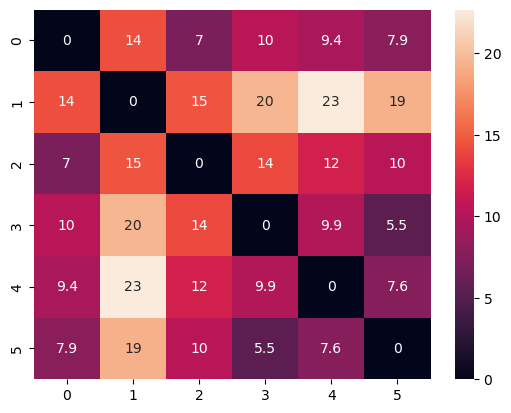

In [106]:
sns.heatmap(diss_mat,annot=True)

In [107]:
df.num

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

In [109]:
#manhat dist
manhat_dis_num=np.zeros((6,6))

for i in range(6):
  for j in range(6):
    dist = 0
    for k in df_numeric:
      dist = dist + abs(df[k].iloc[i] - df[k].iloc[j])
    manhat_dis_num[i][j] = (dist)

manhat_dis_num

array([[  0. , 114.8,  54.3,  96.2,  88.9,  64.5],
       [114.8,   0. , 119.1, 177. , 202.1, 171.7],
       [ 54.3, 119.1,   0. , 119.9, 105.2,  68.8],
       [ 96.2, 177. , 119.9,   0. ,  67.1,  54.7],
       [ 88.9, 202.1, 105.2,  67.1,   0. ,  63.6],
       [ 64.5, 171.7,  68.8,  54.7,  63.6,   0. ]])

In [111]:
manhat_dis_ord=np.zeros((6,6))

for i in range(6):
  for j in range(6):
    dist = 0
    for k in df_ordinal:
      dist = dist + (abs(df[k].iloc[i] - df[k].iloc[j]))
    manhat_dis_ord[i][j] = (dist)

manhat_dis_ord

array([[0.        , 3.5       , 2.66666667, 2.66666667, 2.33333333,
        3.33333333],
       [3.5       , 0.        , 0.83333333, 2.83333333, 2.16666667,
        3.16666667],
       [2.66666667, 0.83333333, 0.        , 3.        , 2.33333333,
        3.33333333],
       [2.66666667, 2.83333333, 3.        , 0.        , 2.33333333,
        1.33333333],
       [2.33333333, 2.16666667, 2.33333333, 2.33333333, 0.        ,
        1.        ],
       [3.33333333, 3.16666667, 3.33333333, 1.33333333, 1.        ,
        0.        ]])

In [113]:
manhat_mix_dis=manhat_dis_num+manhat_dis_ord+diss_mat_assym+diss_sex_mat+dissimilarity_mat
manhat_mix_dis=manhat_mix_dis/5
print(manhat_mix_dis)

[[ 0.         24.06       11.79333333 19.97333333 18.64666667 13.76666667]
 [24.06        0.         23.98666667 36.16666667 41.25333333 35.17333333]
 [11.79333333 23.98666667  0.         24.78       21.90666667 14.62666667]
 [19.97333333 36.16666667 24.78        0.         14.08666667 11.20666667]
 [18.64666667 41.25333333 21.90666667 14.08666667  0.         13.12      ]
 [13.76666667 35.17333333 14.62666667 11.20666667 13.12        0.        ]]


<Axes: >

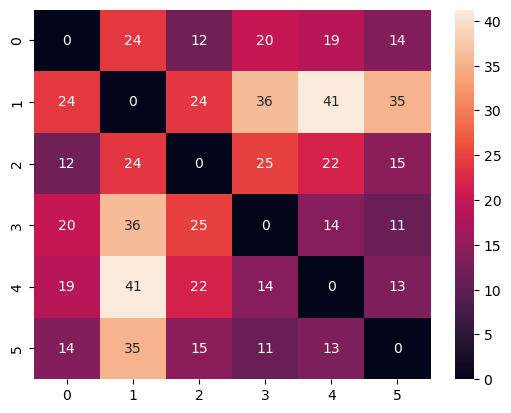

In [114]:
sns.heatmap(manhat_mix_dis,annot=True)

In [116]:
#h=3 in minkowski distance
minkow_num_dis_mat=np.zeros((6,6))

for i in range(6):
  for j in range(6):
    dist = 0
    for k in df_numeric:
      dist = dist + (abs(df[k].iloc[i] - df[k].iloc[j]))**3
    minkow_num_dis_mat[i][j] = np.cbrt((dist))

minkow_num_dis_mat

array([[ 0.        , 60.94831347, 29.24564505, 42.4543876 , 36.60816827,
        33.60511278],
       [60.94831347,  0.        , 63.69839626, 84.04716739, 95.026327  ,
        81.09592573],
       [29.24564505, 63.69839626,  0.        , 61.47931346, 48.4468867 ,
        49.23211159],
       [42.4543876 , 84.04716739, 61.47931346,  0.        , 46.53691307,
        22.4743299 ],
       [36.60816827, 95.026327  , 48.4468867 , 46.53691307,  0.        ,
        33.42970811],
       [33.60511278, 81.09592573, 49.23211159, 22.4743299 , 33.42970811,
         0.        ]])

In [117]:
minkow_ord_dis_mat=np.zeros((6,6))

for i in range(6):
  for j in range(6):
    dist = 0
    for k in df_ordinal:
      dist = dist + ((abs(df[k].iloc[i] - df[k].iloc[j])))**3
    minkow_ord_dis_mat[i][j] = np.cbrt((dist))

minkow_ord_dis_mat

array([[0.        , 1.46200887, 1.15637201, 1.3192972 , 1.26765082,
        1.4481605 ],
       [1.46200887, 0.        , 0.54517772, 1.29306704, 1.12433279,
        1.34281437],
       [1.15637201, 0.54517772, 0.        , 1.16553178, 0.94450852,
        1.22596039],
       [1.3192972 , 1.29306704, 1.16553178, 0.        , 1.26765082,
        1.01219632],
       [1.26765082, 1.12433279, 0.94450852, 1.26765082, 0.        ,
        1.        ],
       [1.4481605 , 1.34281437, 1.22596039, 1.01219632, 1.        ,
        0.        ]])

In [119]:
minkow_mix_dis=minkow_num_dis_mat+minkow_ord_dis_mat+diss_mat_assym+diss_sex_mat+dissimilarity_mat
minkow_mix_dis=minkow_mix_dis/5
print(minkow_mix_dis)

[[ 0.         12.88206447  6.48040341  8.95473696  7.97516382  7.21065465]
 [12.88206447  0.         12.84871479 17.26804689 19.63013196 16.68774802]
 [ 6.48040341 12.84871479  0.         12.72896905 10.27827904 10.2916144 ]
 [ 8.95473696 17.26804689 12.72896905  0.          9.76091278  4.69730525]
 [ 7.97516382 19.63013196 10.27827904  9.76091278  0.          7.08594162]
 [ 7.21065465 16.68774802 10.2916144   4.69730525  7.08594162  0.        ]]


<Axes: >

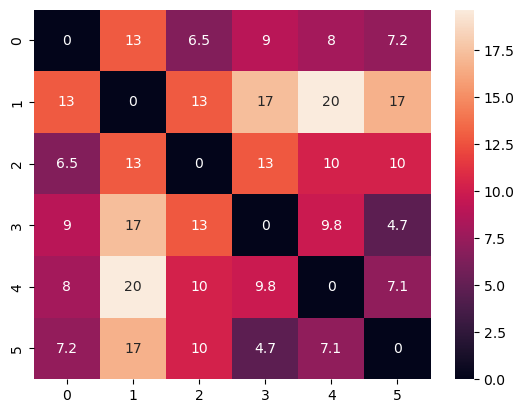

In [120]:
sns.heatmap(minkow_mix_dis,annot=True)

In [122]:
supremum_num_dis_mat=np.zeros((6,6))

for i in range(6):
  for j in range(6):
    dist = 0
    for k in df_numeric:
      dist = max(dist , (abs(df[k].iloc[i] - df[k].iloc[j])))
    supremum_num_dis_mat[i][j] = ((dist))

supremum_num_dis_mat


array([[ 0., 53., 25., 37., 29., 28.],
       [53.,  0., 57., 79., 82., 70.],
       [25., 57.,  0., 58., 43., 49.],
       [37., 79., 58.,  0., 46., 19.],
       [29., 82., 43., 46.,  0., 32.],
       [28., 70., 49., 19., 32.,  0.]])

In [123]:
supremum_ord_dis_mat=np.zeros((6,6))

for i in range(6):
  for j in range(6):
    dist = 0
    for k in df_ordinal:
      dist = max(dist , (abs(df[k].iloc[i] - df[k].iloc[j])))
    supremum_ord_dis_mat[i][j] = (dist)

supremum_ord_dis_mat

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.5       , 1.        , 1.        ,
        1.        ],
       [1.        , 0.5       , 0.        , 1.        , 0.66666667,
        1.        ],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        ]])

In [125]:
supremum_mix_dis=supremum_num_dis_mat+supremum_ord_dis_mat+diss_mat_assym+diss_sex_mat+dissimilarity_mat
supremum_mix_dis=supremum_mix_dis/5
print(supremum_mix_dis)

[[ 0.         11.2         5.6         7.8         6.4         6.        ]
 [11.2         0.         11.5        16.2        17.         14.4       ]
 [ 5.6        11.5         0.         12.          9.13333333 10.2       ]
 [ 7.8        16.2        12.          0.          9.6         4.        ]
 [ 6.4        17.          9.13333333  9.6         0.          6.8       ]
 [ 6.         14.4        10.2         4.          6.8         0.        ]]


<Axes: >

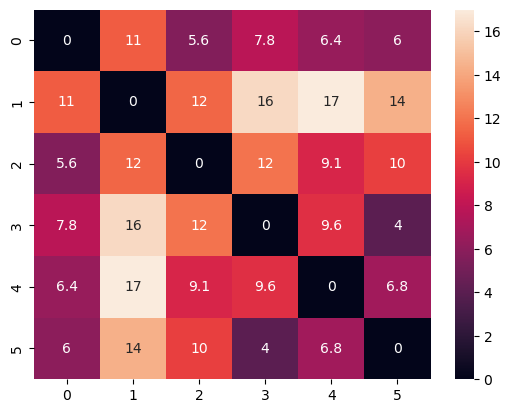

In [126]:
sns.heatmap(supremum_mix_dis,annot=True)

In [128]:
#cosaine dissim
cosaine_num_dis_mat=np.zeros((6,6))

for i in range(6):
  for j in range(6):
    dot_prod=0
    mod_a,mod_b=0,0
    for k in df_numeric:
      dot_prod=dot_prod+df[k].iloc[i] * df[k].iloc[j]
      mod_a=mod_a+np.square(df[k].iloc[i])
      mod_b=mod_b+np.square(df[k].iloc[j])
    cosaine_num_dis_mat[i][j]=1-(dot_prod/(np.sqrt(mod_a)*np.sqrt(mod_b)))

cosaine_num_dis_mat


array([[ 0.00000000e+00,  1.67699186e-02,  3.14314751e-03,
         9.72834895e-03,  8.67318321e-03,  6.99422803e-03],
       [ 1.67699186e-02,  0.00000000e+00,  1.09272205e-02,
         3.85234246e-02,  4.60799428e-02,  3.67150908e-02],
       [ 3.14314751e-03,  1.09272205e-02, -2.22044605e-16,
         1.43883254e-02,  1.82404800e-02,  9.51897157e-03],
       [ 9.72834895e-03,  3.85234246e-02,  1.43883254e-02,
         0.00000000e+00,  3.50412772e-03,  2.17418582e-03],
       [ 8.67318321e-03,  4.60799428e-02,  1.82404800e-02,
         3.50412772e-03,  0.00000000e+00,  4.10235762e-03],
       [ 6.99422803e-03,  3.67150908e-02,  9.51897157e-03,
         2.17418582e-03,  4.10235762e-03,  0.00000000e+00]])

In [129]:
cosaine_ord_dis_mat=np.zeros((6,6))

for i in range(6):
  for j in range(6):
    dot_prod=0
    mod_a,mod_b=0,0
    for k in df_ordinal:
      dot_prod=dot_prod+df[k].iloc[i] * df[k].iloc[j]
      mod_a=mod_a+np.square(df[k].iloc[i])
      mod_b=mod_b+np.square(df[k].iloc[j])
    cosaine_num_dis_mat[i][j]=1-(dot_prod/(np.sqrt(mod_a)*np.sqrt(mod_b)))

cosaine_num_dis_mat


array([[-2.22044605e-16,  5.19615539e-01,  3.27073415e-01,
         5.19615539e-01,  4.52277442e-01,  1.00000000e+00],
       [ 5.19615539e-01, -2.22044605e-16,  5.71481977e-02,
         4.61538462e-01,  2.98353585e-01,  4.45299804e-01],
       [ 3.27073415e-01,  5.71481977e-02,  0.00000000e+00,
         4.34288919e-01,  2.62845860e-01,  4.17228483e-01],
       [ 5.19615539e-01,  4.61538462e-01,  4.34288919e-01,
         0.00000000e+00,  8.24588396e-01,  4.45299804e-01],
       [ 4.52277442e-01,  2.98353585e-01,  2.62845860e-01,
         8.24588396e-01,  0.00000000e+00,  6.83772234e-01],
       [ 1.00000000e+00,  4.45299804e-01,  4.17228483e-01,
         4.45299804e-01,  6.83772234e-01,  0.00000000e+00]])

In [130]:
cosaine_mix_dis=cosaine_ord_dis_mat+cosaine_num_dis_mat+diss_mat_assym+diss_sex_mat+dissimilarity_mat
cosaine_mix_dis=cosaine_mix_dis/5
print(cosaine_mix_dis)

[[-4.44089210e-17  5.03923108e-01  4.65414683e-01  3.03923108e-01
   4.90455488e-01  4.00000000e-01]
 [ 5.03923108e-01 -4.44089210e-17  1.14296395e-02  2.92307692e-01
   4.59670717e-01  2.89059961e-01]
 [ 4.65414683e-01  1.14296395e-02  0.00000000e+00  2.86857784e-01
   4.52569172e-01  2.83445697e-01]
 [ 3.03923108e-01  2.92307692e-01  2.86857784e-01  0.00000000e+00
   3.64917679e-01  8.90599608e-02]
 [ 4.90455488e-01  4.59670717e-01  4.52569172e-01  3.64917679e-01
   0.00000000e+00  3.36754447e-01]
 [ 4.00000000e-01  2.89059961e-01  2.83445697e-01  8.90599608e-02
   3.36754447e-01  0.00000000e+00]]


<Axes: >

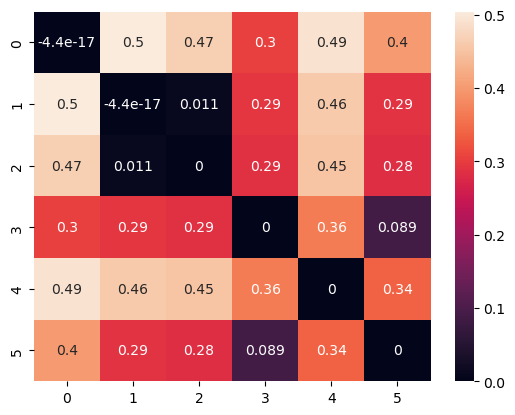

In [131]:
sns.heatmap(cosaine_mix_dis,annot=True)